In [57]:
a = [(-2,0), (0,1) ,(1,3)]

min_row,_ = min(a, key=lambda x: x[0])
list(map(lambda x: (x[0]+abs(min_row),x[1]), a))

[(0, 0), (2, 1), (3, 3)]

In [58]:
import numpy as np

def dig_trench(dig_map,dict):
    grid = []
    cur = (0,0)
    
    for dig in dig_map:
        for _ in range(int(dig[1])):
            cur = (cur[0] + dict[dig[0]][0], cur[1] + dict[dig[0]][1])
            grid.append(cur)

    # Normalize coords
    min_row,_ = min(grid, key=lambda x: x[0])
    _,min_col = min(grid, key=lambda x: x[1])

    if min_row < 0:
        grid = list(map(lambda x: (x[0]+abs(min_row),x[1]), grid))
    if min_col < 0:
        grid = list(map(lambda x: (x[0],x[1]+abs(min_col)), grid))
    
    rows,_ = max(grid, key=lambda x: x[0])
    _,cols = max(grid, key=lambda x: x[1])

    lagoon = np.zeros((rows+1,cols+1))
    
    for i in grid:
        lagoon[i] = 1
    
    return lagoon

In [59]:
dir_dict = {'U':(-1,0), 'D':(1,0), 'L':(0,-1), 'R':(0,1)}

dig_map = [l.split() for l in open('input.txt').read().splitlines()]

a = dig_trench(dig_map, dir_dict)
a


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

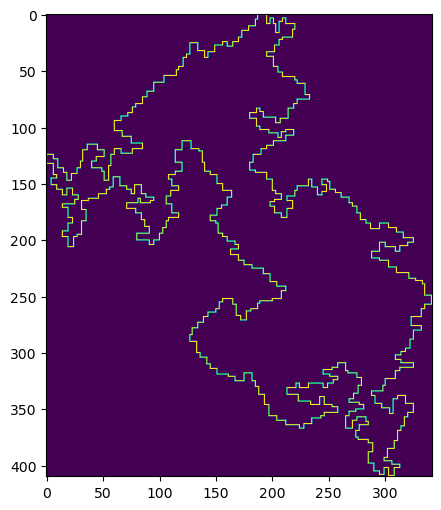

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.imshow(a)

In [61]:
def flood_recursive(matrix, start=(1,1)):
    width = len(matrix)
    height = len(matrix[0])
    def fill(x,y,start_color,color_to_update):
        #if the square is not the same color as the starting point
        if matrix[x][y] != start_color:
            return
        #if the square is not the new color
        elif matrix[x][y] == color_to_update:
            return
        else:
            #update the color of the current square to the replacement color
            matrix[x][y] = color_to_update
            neighbors = [(x-1,y),(x+1,y),(x-1,y-1),(x+1,y+1),(x-1,y+1),(x+1,y-1),(x,y-1),(x,y+1)]
            for n in neighbors:
                if 0 <= n[0] <= width-1 and 0 <= n[1] <= height-1:
                    fill(n[0],n[1],start_color,color_to_update)
    #pick a random starting point
    start_x, start_y = start
    start_color = matrix[start_x][start_y]
    fill(start_x,start_y,start_color,9)
    return matrix

In [62]:
# import sys
# sys.setrecursionlimit(1000000)

# c = flood_recursive(a,(100,100))

# res = 0
# for line in c:
#     for i in line:
#         if i:
#             res += 1
# print(res)

# plt.figure(figsize=(20, 20))
# plt.imshow(c)


In [63]:
def translate_hex(hex_string):
    dir_dic = {'0':'R', '1':'D', '2':'L', '3':'U'}
    dist = int(hex_string[2:7],16)
    direction = dir_dic[hex_string[7]]

    return direction, dist

In [64]:
def dig_map_to_points(dig_map):
    p = (0,0)
    res = []

    for d,s in dig_map:
        p = (p[0]+dir_dict[d[0]][0]*int(s), p[1]+dir_dict[d[0]][1]*int(s))
        res.append(p)

    return res

In [65]:
def polygonArea(vertices):
  #A function to apply the Shoelace algorithm
  numberOfVertices = len(vertices)
  sum1 = 0
  sum2 = 0
  
  for i in range(numberOfVertices-1):
    sum1 += vertices[i][0] *  vertices[i+1][1]
    sum2 += vertices[i][1] *  vertices[i+1][0]
  
  #Add xn.y1
  sum1 += vertices[numberOfVertices-1][0]*vertices[0][1]   
  #Add x1.yn
  sum2 += vertices[0][0]*vertices[numberOfVertices-1][1]   
  
  area = abs(sum1 - sum2) // 2
  return area

In [66]:
new_dig_map = [translate_hex(x[2]) for x in dig_map]

In [67]:
a = dig_map_to_points(new_dig_map)
polygonArea(a) + sum([int(x) for _,x in new_dig_map])//2 + 1

148442153147147